# Cluster Transformer

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20, 15)

In [2]:
points = np.array(
    [
        0,
        0.01,
        0.02,
        0.03,
        1.5,
        2.0,
        2.2,
        3.5,
        3.6,
        4.0,
        5.1,
        6.0,
        6.5,
        7.5,
        8.0,
        900,
        901,
        902,
        903,
        903,
        903,
        901,
        892,
        897,
        55_000_000,
        50,
    ]
)

points = np.concatenate(
    (
        np.random.normal(loc=4_000_00, scale=30_000, size=6000),
        np.random.normal(loc=3_800_00, scale=30_000, size=3000),
        np.random.normal(loc=3_900, scale=200, size=1000),
    )
)

In [3]:
points_with_outliers = np.concatenate(
    (points, [390441 / 2], [0], [1_000_000], [10_000_000])
)

In [4]:
from clustered_transforms.scale_clustering import ScaleClusterTransformer

In [5]:
m = ScaleClusterTransformer(
    image_lower_cap=-1,
    image_upper_cap=1,
    inter_cluster_uncertainty=0.5,
    cluster_orders_of_magnitude=0.5,
)

In [6]:
m.fit(points_with_outliers)

ScaleClusterTransformer(cluster_orders_of_magnitude=0.5, image_lower_cap=-1,
                        inter_cluster_uncertainty=0.5)

In [26]:
def plot_image_space(lower_pos, upper_pos, transformer):
    num_points = 100000  # Adjust this to change the number of data points
    positions = np.array(
        [
            lower_pos + (upper_pos - lower_pos) * i / (num_points - 1)
            for i in range(num_points)
        ]
    )
    # Calculate the force ratio for each position
    image_positions = transformer.transform(positions.reshape(-1, 1))

    # Create the plot
    plt.plot(positions, image_positions)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Projective Space")
    plt.grid(True)
    plt.show()

In [27]:
m.clusters_

[Cluster - [min: 0.0, min: 0.0, y_min: -0.9097500000000001, y_max: -0.9097500000000001],
 Cluster - [min: 3227.6995670593196, min: 4612.662026434828, y_min: -0.664651966787859, y_max: -0.3250145346338735],
 Cluster - [min: 195220.5, min: 509710.07105420996, y_min: -0.011810871564434944, y_max: 0.42220194556027146],
 Cluster - [min: 1000000.0, min: 1000000.0, y_min: 0.73540560862971, y_max: 0.73540560862971],
 Cluster - [min: 10000000.0, min: 10000000.0, y_min: 0.766400249278692, y_max: 0.766400249278692]]

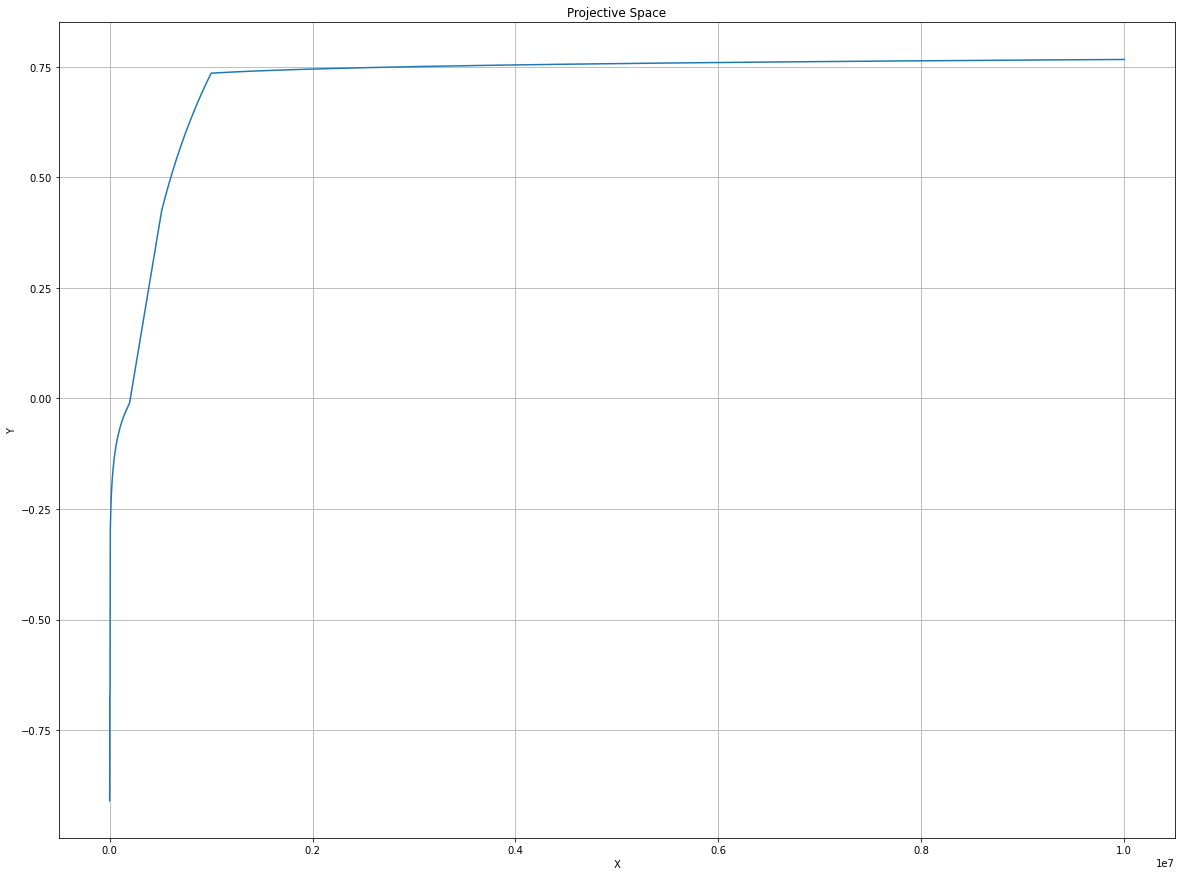

In [28]:
plot_image_space(0, 10_000_000, m)

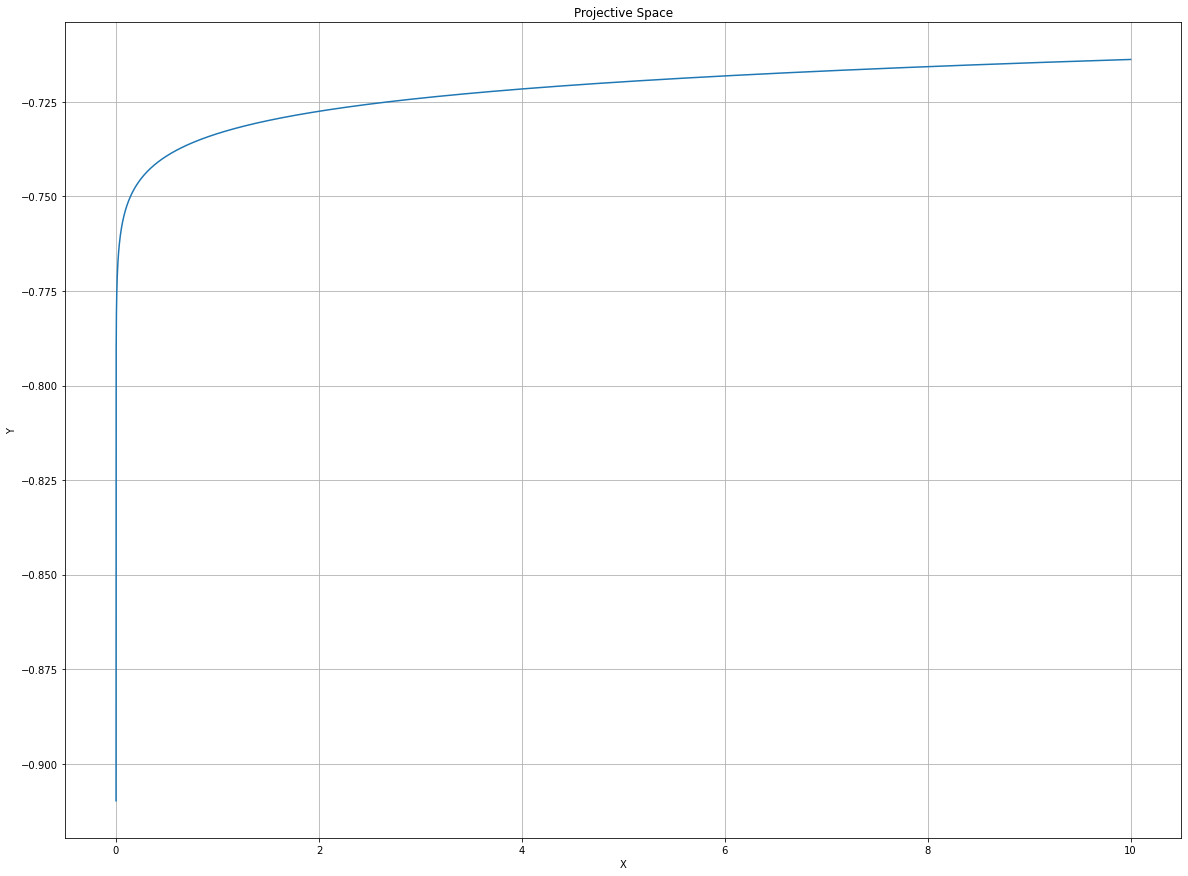

In [29]:
plot_image_space(0, 10, m)

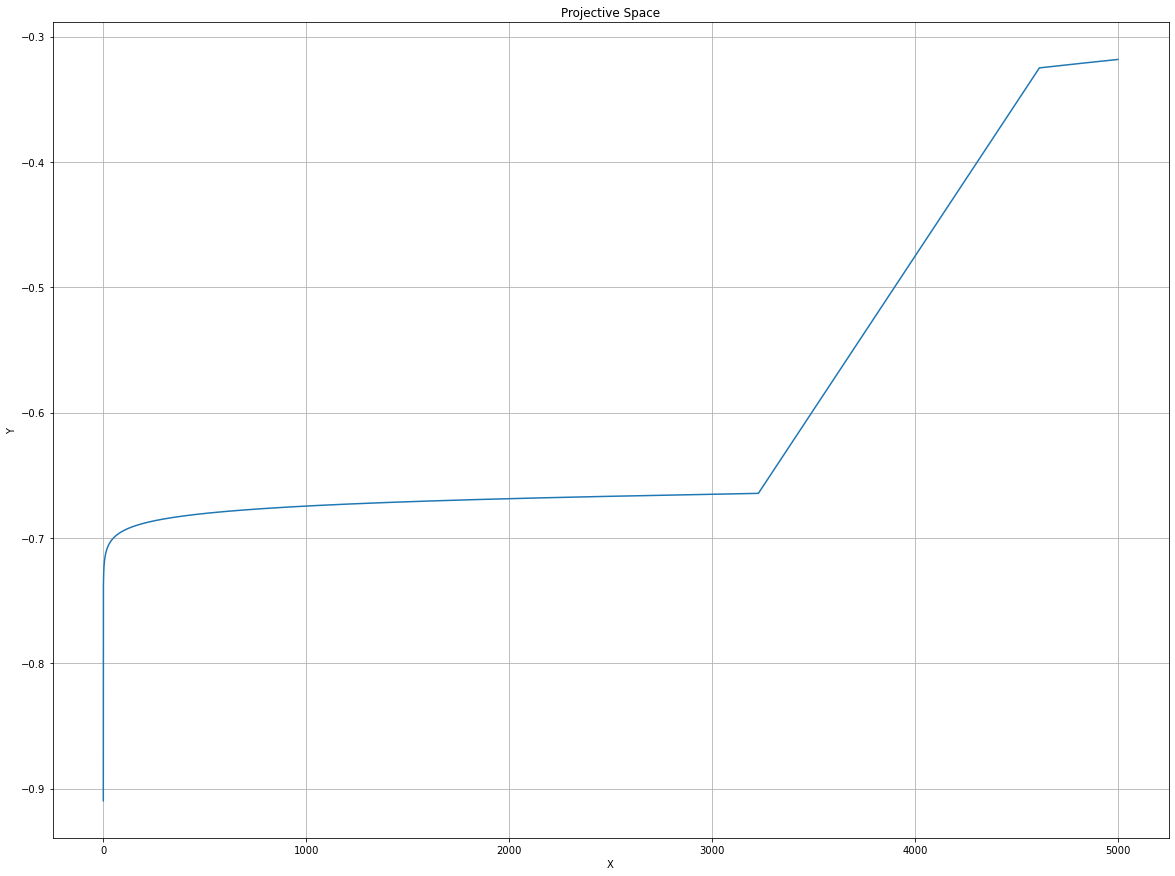

In [30]:
plot_image_space(0, 5_000, m)

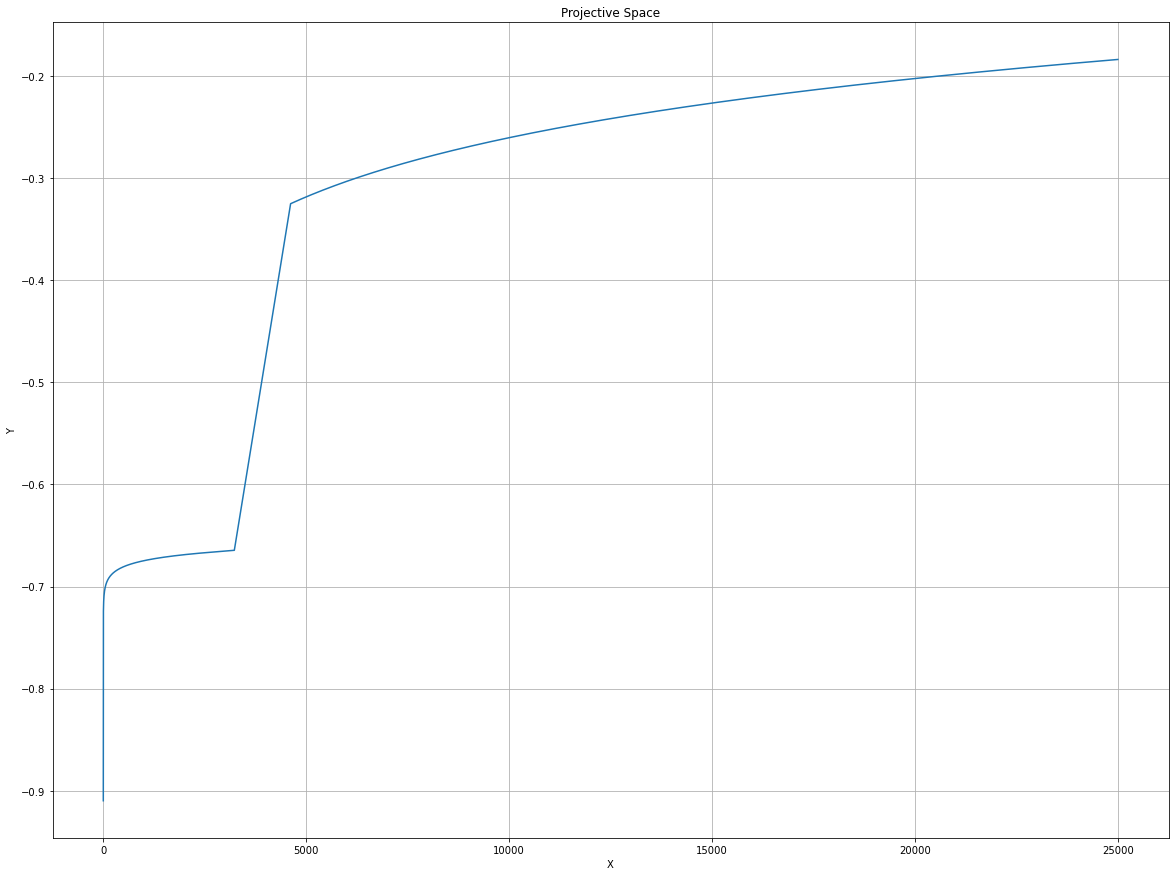

In [31]:
plot_image_space(0, 25_000, m)

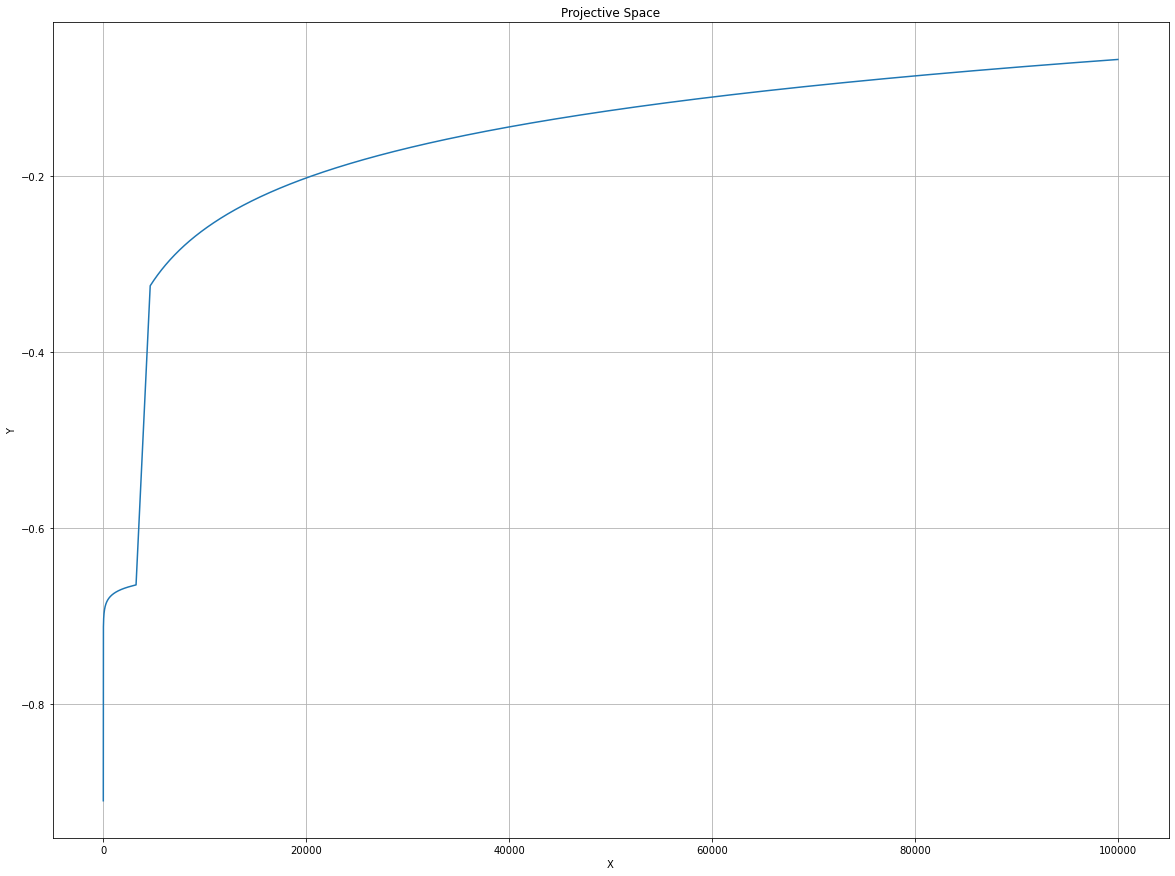

In [32]:
plot_image_space(0, 100_000, m)

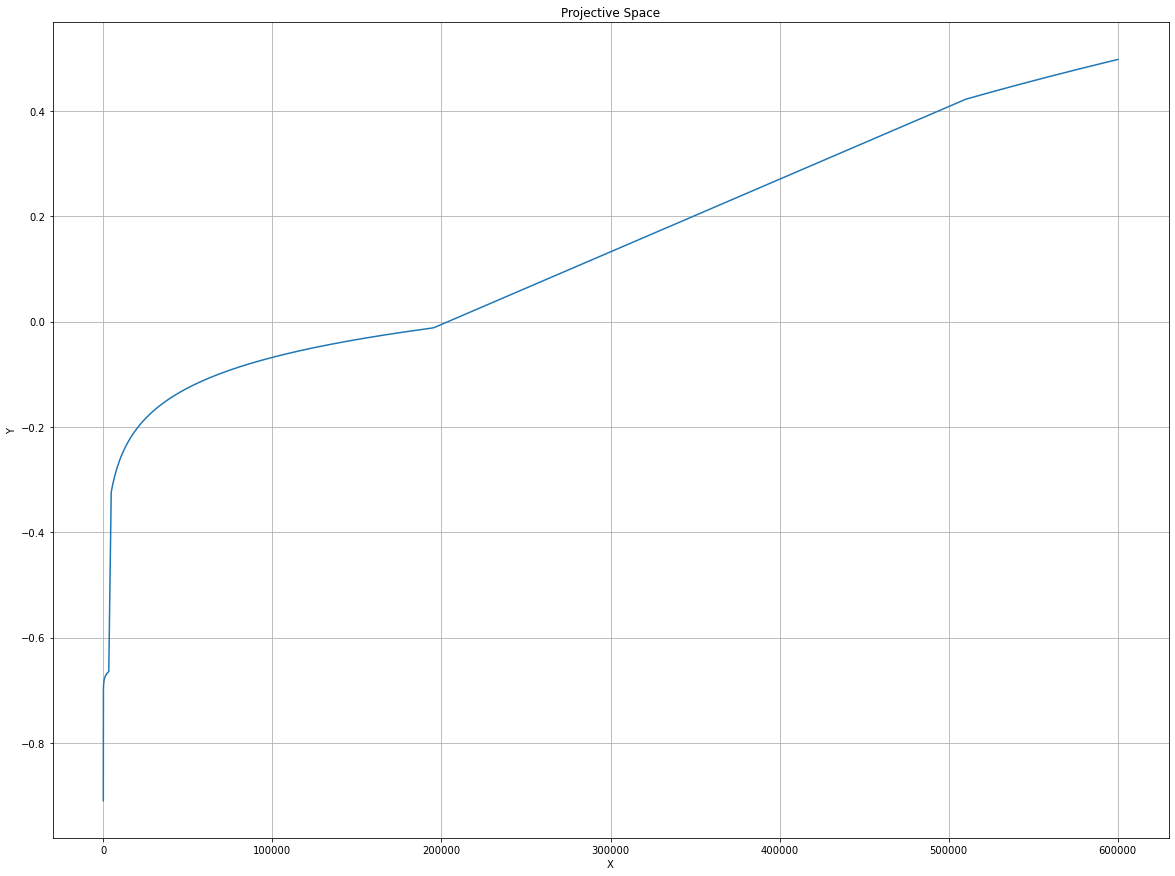

In [33]:
plot_image_space(0, 600_000, m)

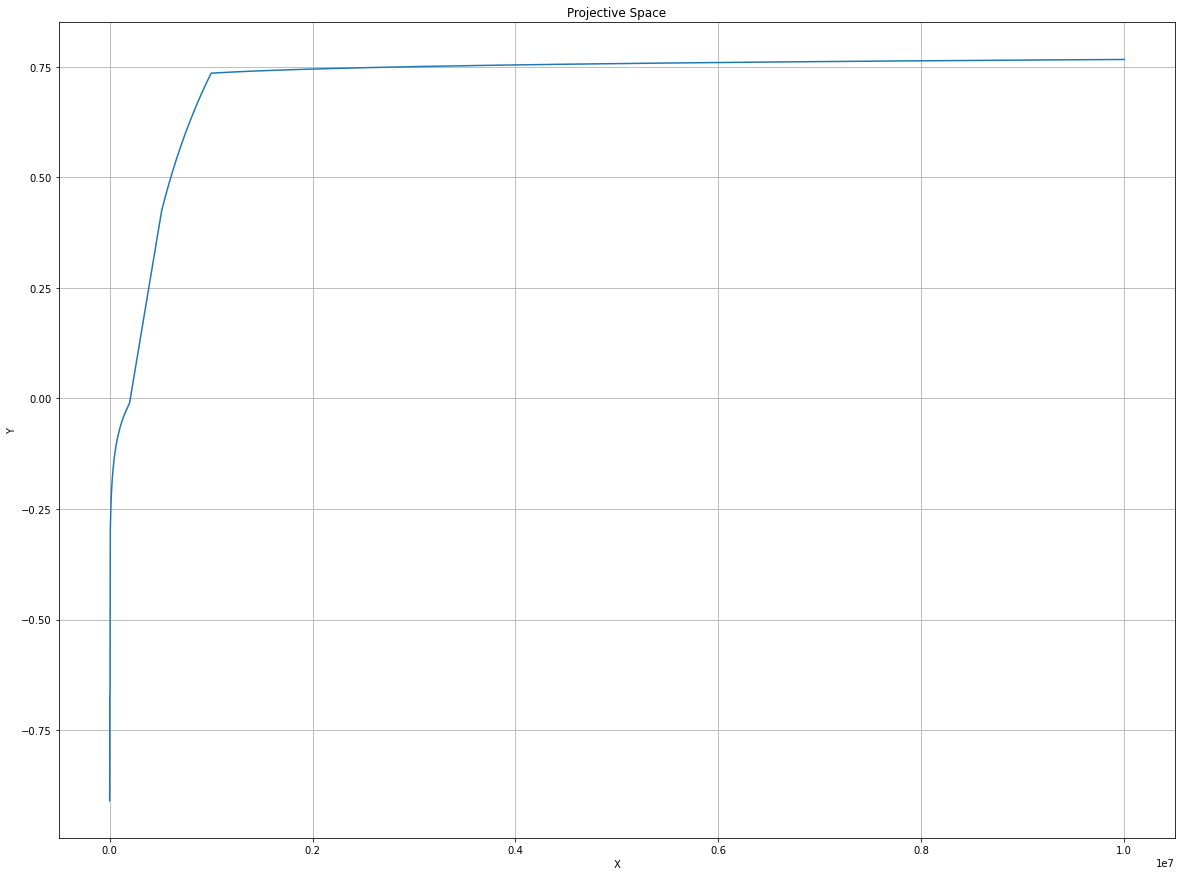

In [34]:
plot_image_space(0, 10_000_000, m)

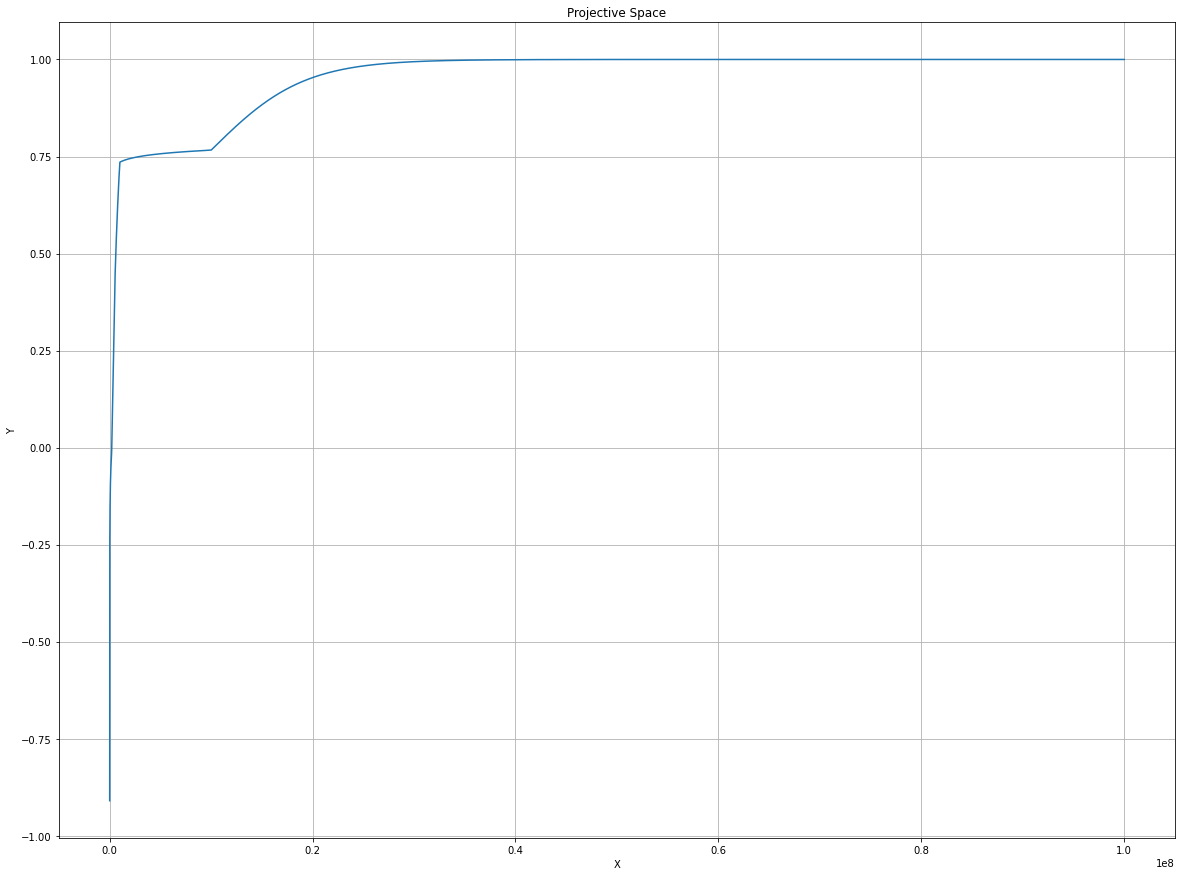

In [35]:
plot_image_space(0, 100_000_000, m)

# Comparison of projective spaces

In [49]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer

# Reshape the 1D array into a 2D array (required for sklearn)
data = np.array(points_with_outliers).reshape(-1, 1)

# Create the RobustScaler and QuantileTransformer objects
robust_scaler = RobustScaler()
quantile_transformer = QuantileTransformer()

# Fit and transform the data using the RobustScaler
robust_scaled_data = robust_scaler.fit_transform(data)

# Fit and transform the data using the QuantileTransformer
quantile_scaled_data = quantile_transformer.fit_transform(data)

# Reshape the scaled data back to 1D arrays
robust_scaled_data = robust_scaled_data.flatten()
quantile_scaled_data = quantile_scaled_data.flatten()

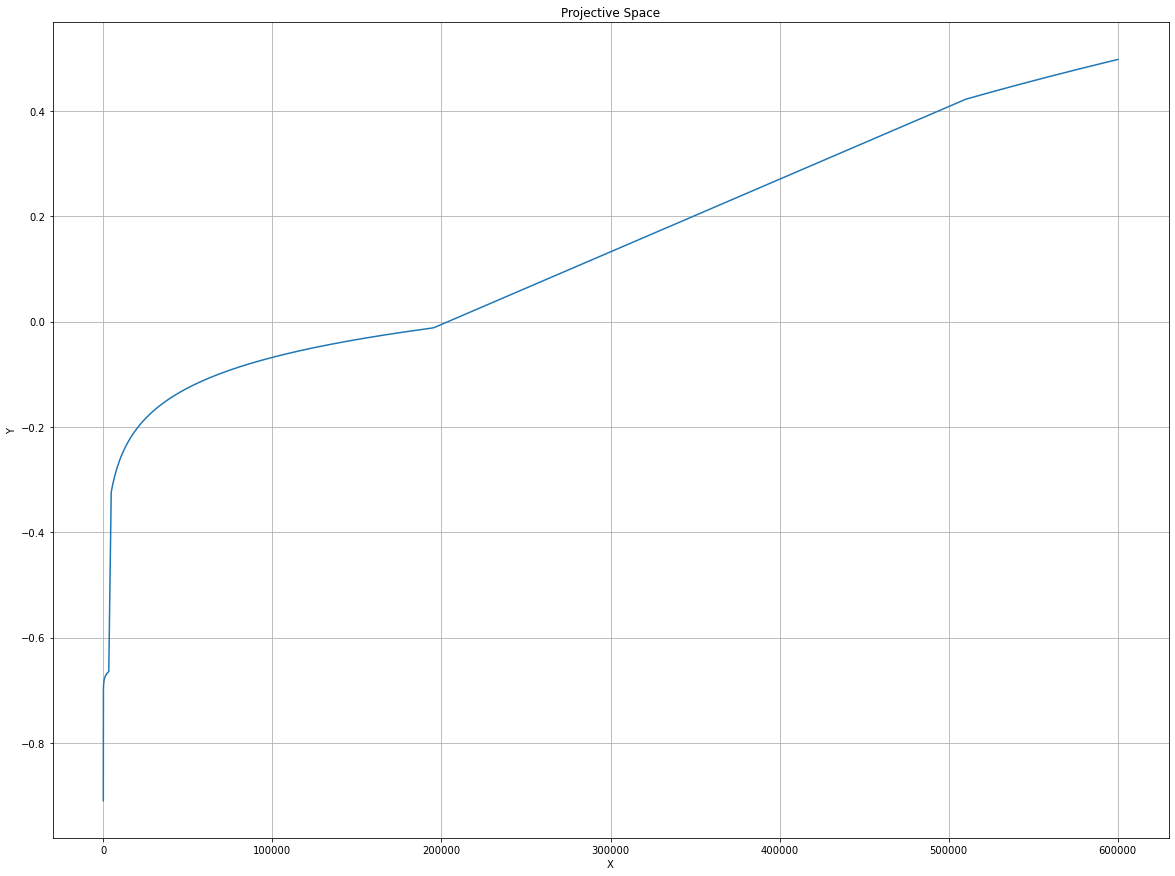

In [55]:
plot_image_space(0, 600_000, m)

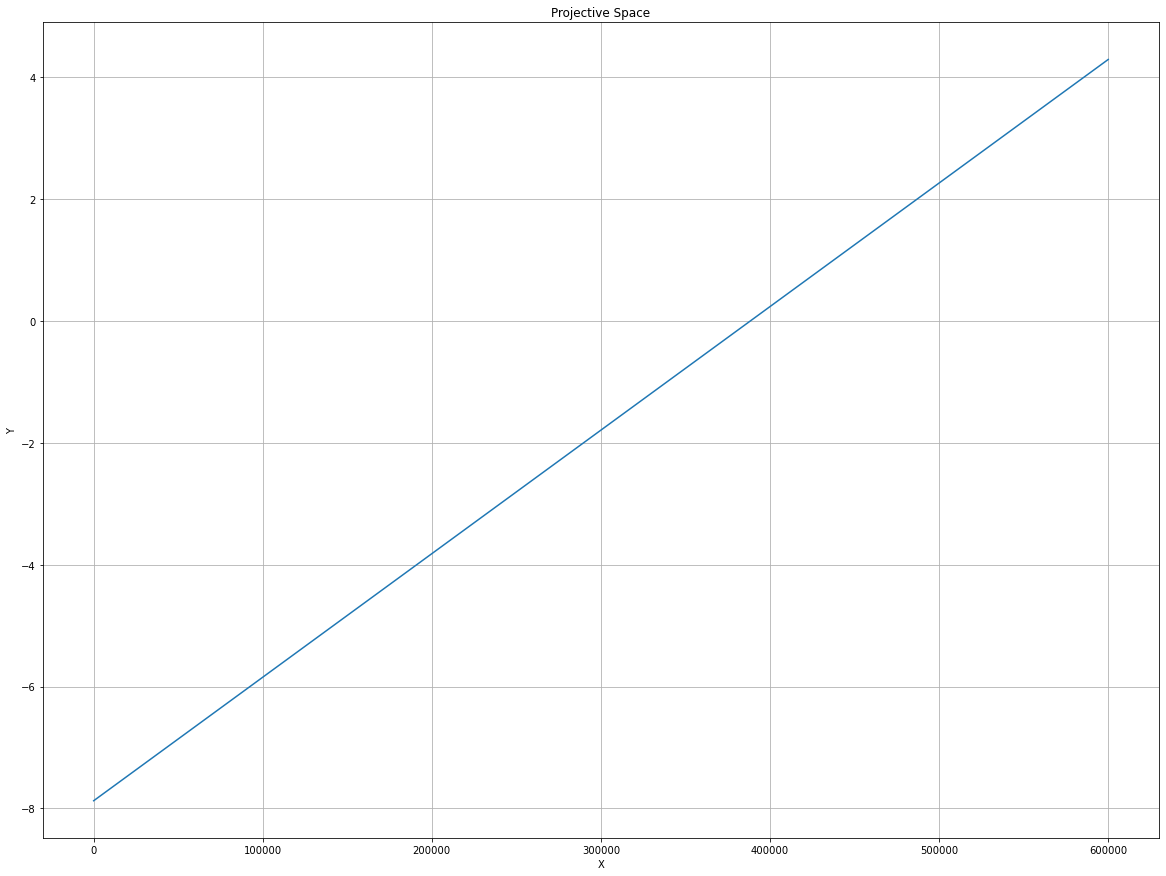

In [54]:
plot_image_space(0, 600_000, robust_scaler)

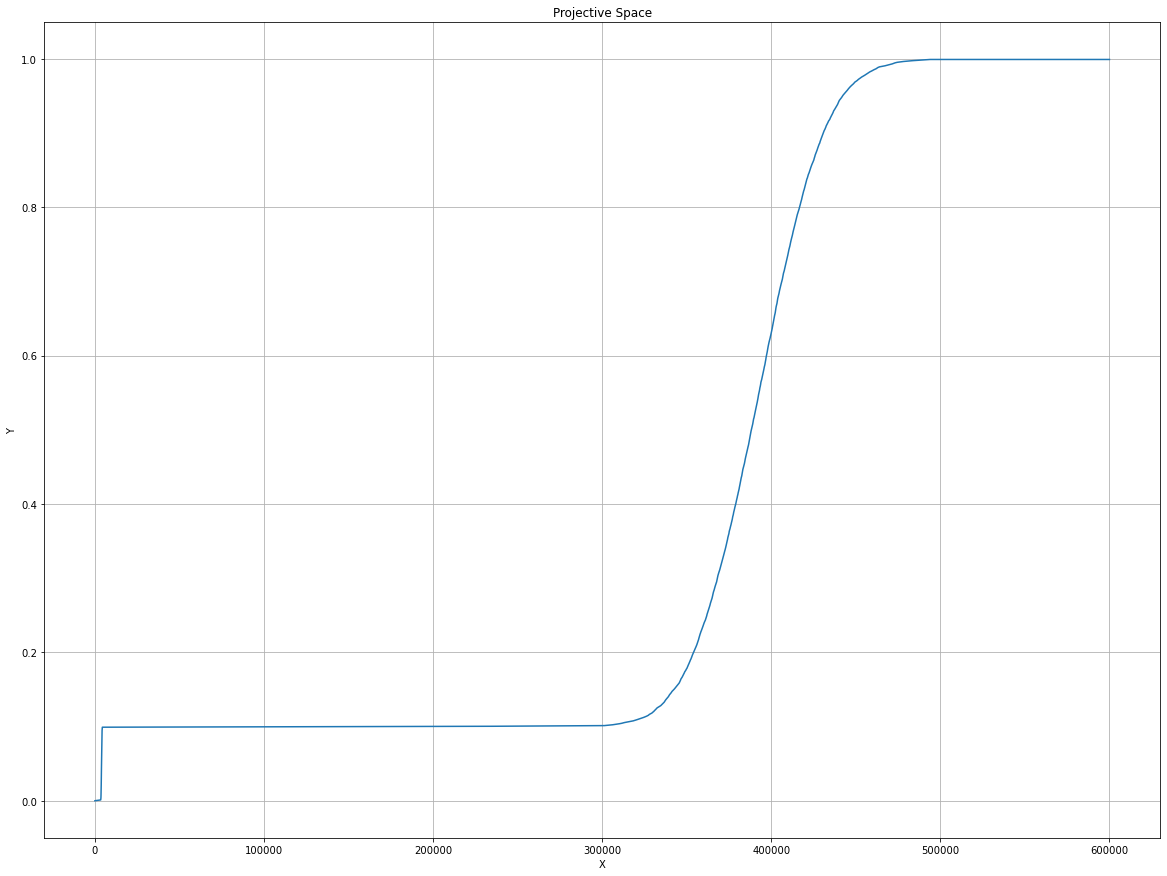

In [53]:
plot_image_space(0, 600_000, quantile_transformer)

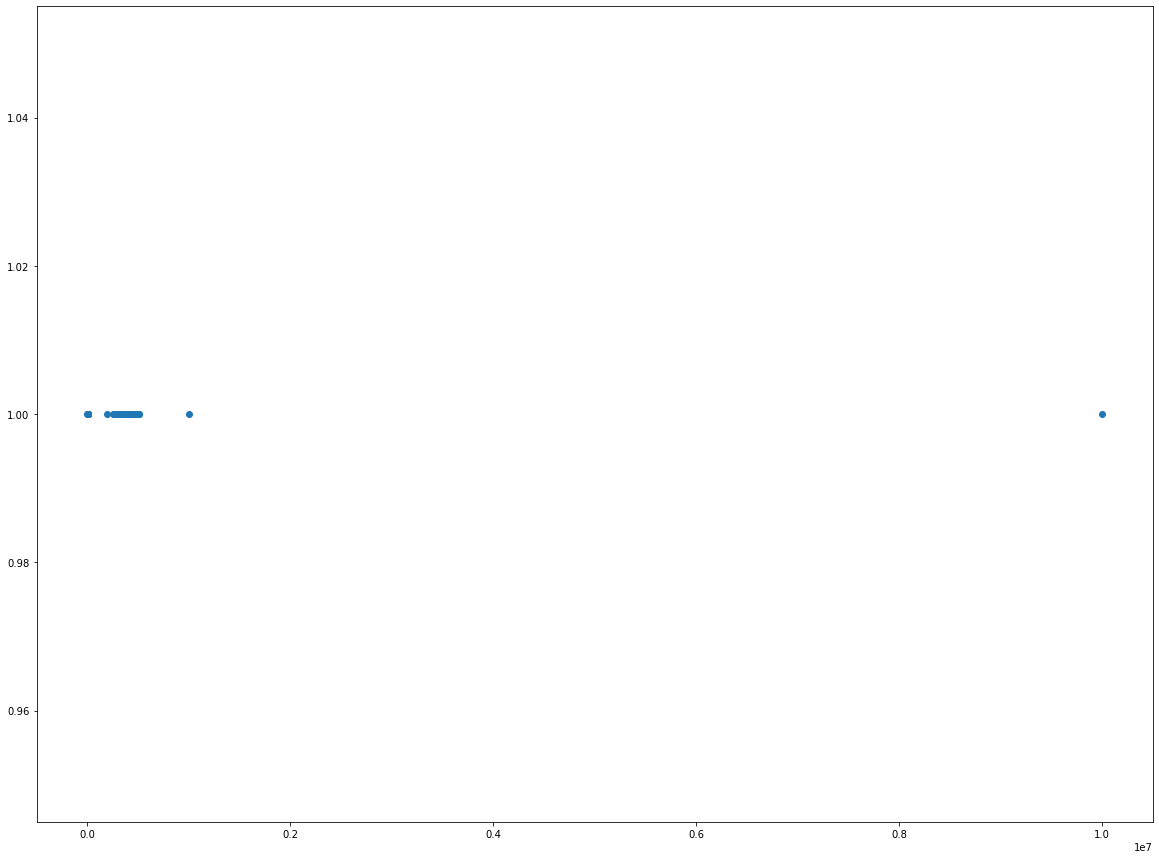

In [56]:
plt.scatter(points_with_outliers, [1] * len(points_with_outliers))

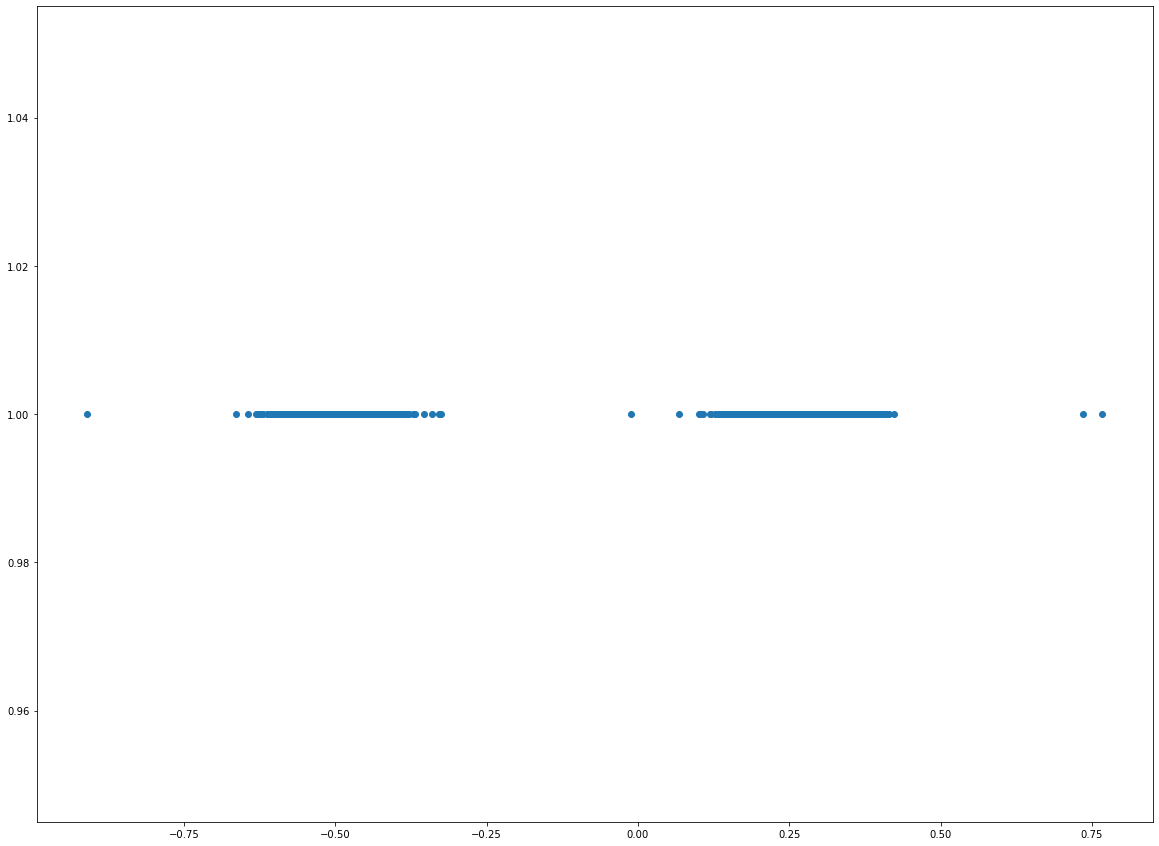

In [57]:
plt.scatter(m.transform(points_with_outliers), ([1] * (len(points_with_outliers))))

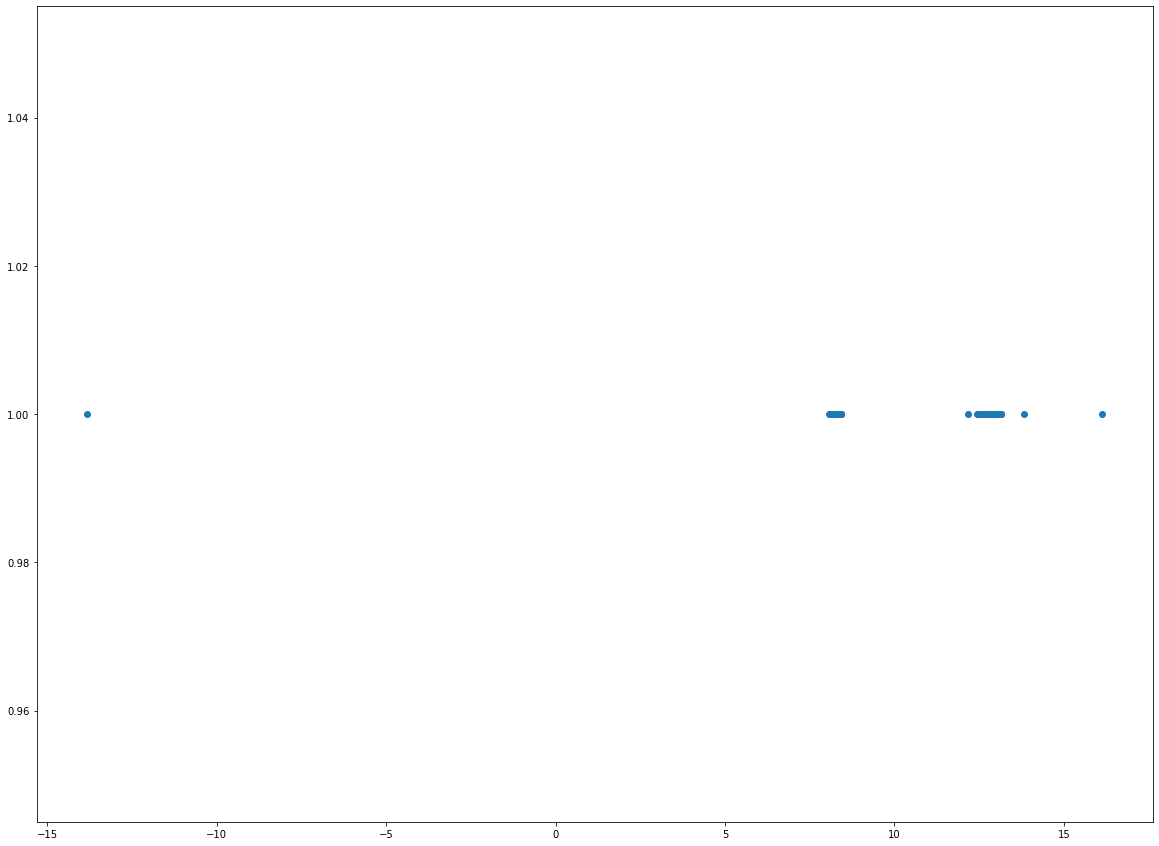

In [58]:
plt.scatter(
    [np.log(x + 1e-6) for x in points_with_outliers], [1] * len(points_with_outliers)
)

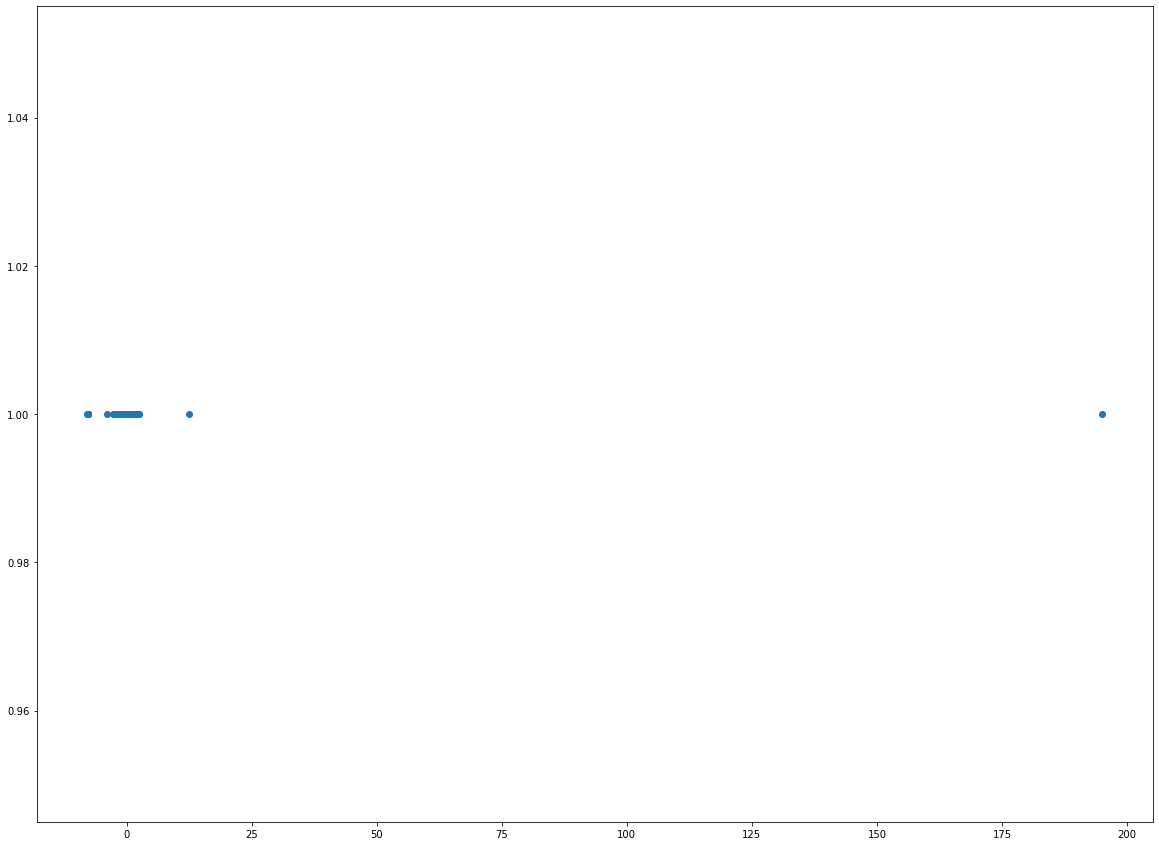

In [59]:
plt.scatter(robust_scaled_data.flatten(), [1] * len(points_with_outliers))

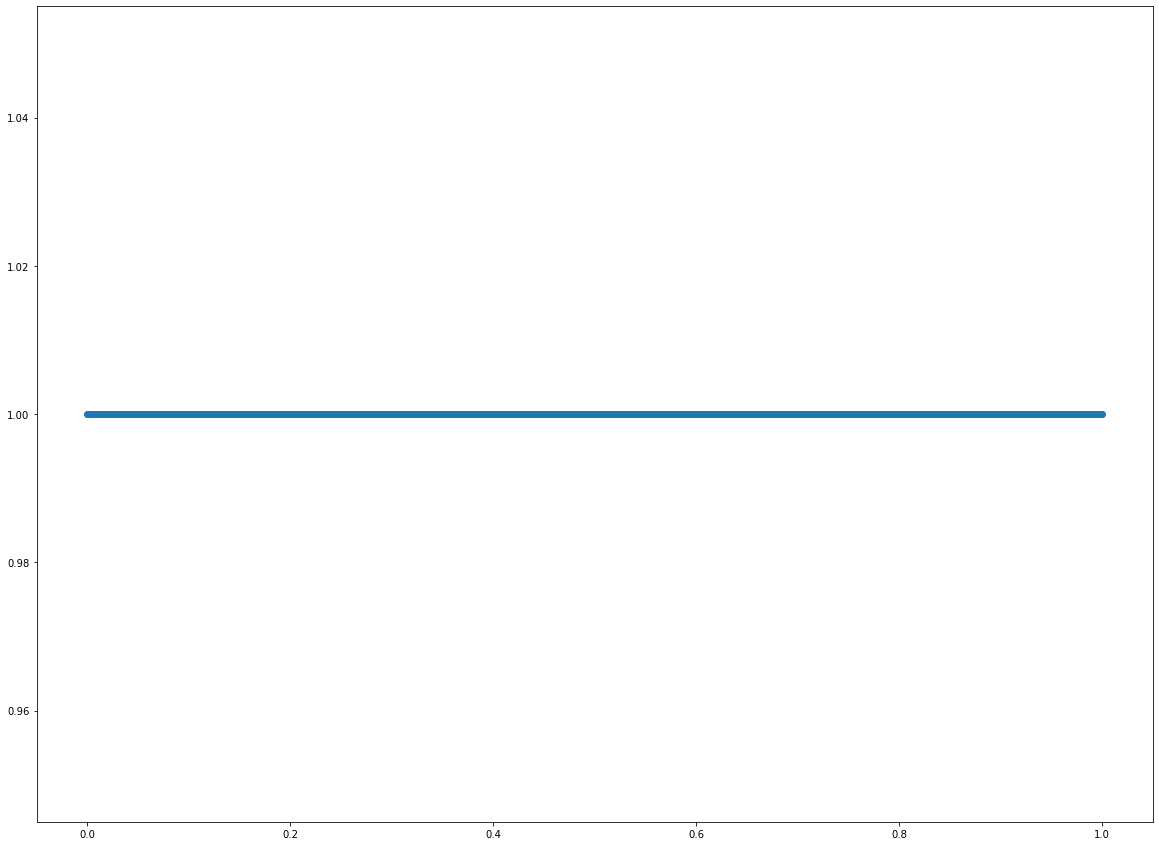

In [60]:
plt.scatter(quantile_scaled_data.flatten(), [1] * len(points_with_outliers))